In [1]:
import os
import tarfile
import shutil
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Define the dataset archive path and extraction target
tgz_path = "../data/lfw-funneled.tgz"        # Path to the .tgz file
extract_to = "../data/lfw-funneled"          # Target folder after extraction

In [3]:
# Extract .tgz file only if not already extracted
if not os.path.exists(extract_to):
    print("🔍 Extracting lfw-funneled.tgz...")
    with tarfile.open(tgz_path, "r:gz") as tar:
        tar.extractall(path="../data/")
    print("✅ Extraction complete.")
else:
    print("✅ Dataset already extracted.")

✅ Dataset already extracted.


In [4]:
# Some lfw-funneled.tgz have nested structure like lfw-funneled/lfw_funneled
nested_path = os.path.join(extract_to, "lfw_funneled")

if os.path.exists(nested_path):
    print("🔧 Fixing nested folder structure...")
    for item in os.listdir(nested_path):
        src = os.path.join(nested_path, item)
        dst = os.path.join(extract_to, item)
        shutil.move(src, dst)
    os.rmdir(nested_path)
    print("✅ Nested folder removed and contents moved to correct location.")
else:
    print("✅ Folder structure already correct.")

✅ Folder structure already correct.


In [5]:
# Count number of people (folders) and total face images
person_dirs = [d for d in os.listdir(extract_to) if os.path.isdir(os.path.join(extract_to, d))]
total_people = len(person_dirs)
total_images = 0

for person in person_dirs:
    person_path = os.path.join(extract_to, person)
    image_files = [f for f in os.listdir(person_path) if f.endswith(('.jpg', '.pgm'))]
    total_images += len(image_files)

print(f"✅ Total People: {total_people}")
print(f"✅ Total Images: {total_images}")

✅ Total People: 100
✅ Total Images: 186


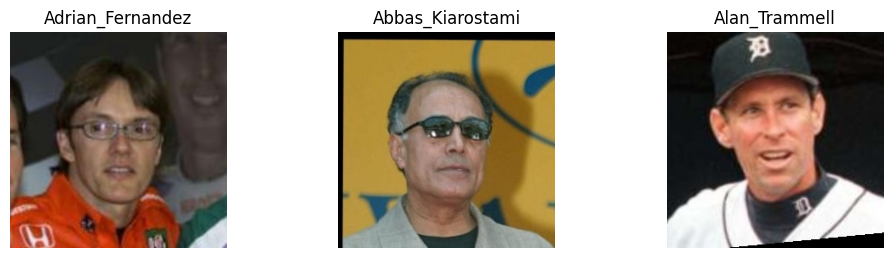

In [6]:
# Display 6 sample images from the dataset
sample_images = []

for person in person_dirs[:3]:  # First 3 people
    person_path = os.path.join(extract_to, person)
    image_files = [f for f in os.listdir(person_path) if f.endswith(('.jpg', '.pgm'))]
    for img_name in image_files[:2]:  # First 2 images of each
        img_path = os.path.join(person_path, img_name)
        try:
            img = Image.open(img_path)
            sample_images.append((person, img))
        except:
            continue  # Skip corrupt or unreadable files

# Plotting the images
plt.figure(figsize=(10, 5))
for idx, (name, img) in enumerate(sample_images):
    plt.subplot(2, 3, idx + 1)
    plt.imshow(img)
    plt.title(name)
    plt.axis("off")
plt.tight_layout()
plt.show()